In [39]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd

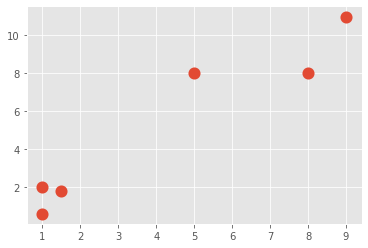

In [40]:
style.use('ggplot')
xs = np.array([[1, 2],[1.5, 1.8],[5, 8],[8, 8],[1, 0.6],[9, 11]])
plt.scatter(xs[:,0],xs[:,1],s=50,linewidths=5)
plt.show()

In [41]:
classifier = KMeans(n_clusters=2)
classifier.fit(xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
means = classifier.cluster_centers_
labels = classifier.labels_
print(means)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 0 1 1 0 1]


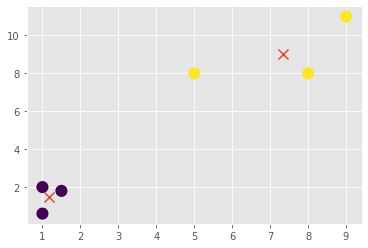

In [43]:
plt.scatter(xs[:,0],xs[:,1],s=50,c=labels,linewidths=5)
plt.scatter(means[:,0],means[:,1],s=100,linewidths=10,marker='x',zorder=10)
plt.show()

In [87]:
df = pd.read_excel('titanic.xls')
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [88]:
df.drop(['name','body','embarked'],1,inplace=True)

In [89]:
df.fillna(0,inplace=True)

In [90]:
df=pd.get_dummies(df)

In [91]:
print(df.head)

<bound method NDFrame.head of       pclass  survived      age  sibsp  parch      fare  sex_female  sex_male  \
0          1         1  29.0000      0      0  211.3375           1         0   
1          1         1   0.9167      1      2  151.5500           0         1   
2          1         0   2.0000      1      2  151.5500           1         0   
3          1         0  30.0000      1      2  151.5500           0         1   
4          1         0  25.0000      1      2  151.5500           1         0   
5          1         1  48.0000      0      0   26.5500           0         1   
6          1         1  63.0000      1      0   77.9583           1         0   
7          1         0  39.0000      0      0    0.0000           0         1   
8          1         1  53.0000      2      0   51.4792           1         0   
9          1         0  71.0000      0      0   49.5042           0         1   
10         1         0  47.0000      1      0  227.5250           0         1  

In [92]:
classifier.fit(df.drop(['survived'],1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
means=classifier.cluster_centers_
labels = classifier.labels_

In [94]:
print(means)
print(labels)

[[ 2.36914378e+00  2.33184572e+01  4.88691438e-01 ...  8.07754443e-04
   4.38017678e-17  2.42326333e-03]
 [ 1.00000000e+00  3.36255873e+01  6.76056338e-01 ... -6.50521303e-19
   5.63380282e-02  8.67361738e-19]]
[1 1 1 ... 0 0 0]


In [95]:
survived = np.array(df['survived'])
print(np.logical_not(np.logical_xor(survived , labels)))
accuracy = sum(np.logical_not(np.logical_xor(survived , labels)))/len(survived)
print(accuracy)

[ True  True False ...  True  True  True]
0.6417112299465241
